# Murmuration Hiring Exercise

## 1) Create a new table and load in the data.

In [21]:
import csv
import psycopg2
conn = psycopg2.connect(host="localhost", dbname="postgres", user="postgres", password="secret123")
cur = conn.cursor()
cur.execute("""
    CREATE TABLE voters(
    vb_tsmart_first_name varchar,
    vb_voterbase_gender varchar,
    vb_tsmart_state varchar,
    vb_voterbase_db varchar,
    vb_firsttimeseen_voterid varchar,
    vb_voterbase_voter_score varchar,
    vhsyn_vf_g2016_synthetic varchar)
""")
with open('SQL_exploration_sample_data.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader) # Skip the header row.
    for row in reader:
        cur.execute(
        "INSERT INTO voters VALUES (%s, %s, %s, %s, %s, %s, %s)",
        row
    )
conn.commit()

## 2) Display the first 10 rows.

In [22]:
cur.execute("""SELECT * FROM voters
    LIMIT 10""")
cur.fetchall()

[('DONALD', 'Male', 'VT', '19620101', '20170531', 'Never Voted', 'N'),
 ('SHALLI', 'Female', 'OK', '19601216', '20160325', 'Infrequent Voter', 'E'),
 ('RASHAD', 'Male', 'FL', '19960925', '20140116', 'Never Voted', 'N'),
 ('PATRICK', 'Male', 'PA', '19951003', '20140114', 'Infrequent Voter', 'A'),
 ('JESUS', 'Male', 'DE', '19571201', '20161129', 'Super Voter', 'Y'),
 ('ALYSSA', 'Female', 'NC', '19970101', '20160708', 'Infrequent Voter', 'A'),
 ('MARJORIE', 'Female', 'CA', '19930823', '20161130', 'Infrequent Voter', 'A'),
 ('ANGELA', 'Female', 'MA', '19570803', '20140826', 'Never Voted', 'N'),
 ('CLAIRE', 'Female', 'OK', '19691001', '20160325', 'Infrequent Voter', 'Y'),
 ('JESSICA', 'Female', 'VA', '19950316', '20141030', 'Never Voted', 'N')]

## 3) Summarize the total record count by state.

In [30]:
cur.execute("""SELECT vb_tsmart_state, count(vb_tsmart_state) FROM voters
    GROUP BY vb_tsmart_state
    ORDER BY count(vb_tsmart_state) DESC
    """)
cur.fetchall()

[('CA', 1533),
 ('TX', 764),
 ('FL', 582),
 ('WI', 564),
 ('NY', 481),
 ('PA', 392),
 ('IL', 360),
 ('OH', 358),
 ('GA', 327),
 ('NC', 296),
 ('IN', 247),
 ('AZ', 245),
 ('NJ', 224),
 ('MI', 223),
 ('WA', 219),
 ('MA', 210),
 ('VA', 195),
 ('TN', 193),
 ('AL', 164),
 ('CO', 159),
 ('MD', 153),
 ('MO', 152),
 ('OK', 133),
 ('KY', 131),
 ('LA', 130),
 ('MN', 129),
 ('SC', 129),
 ('NV', 125),
 ('OR', 110),
 ('CT', 110),
 ('AR', 100),
 ('UT', 84),
 ('IA', 74),
 ('KS', 67),
 ('MS', 65),
 ('NH', 60),
 ('NE', 53),
 ('ME', 48),
 ('WV', 47),
 ('ID', 45),
 ('NM', 41),
 ('DC', 37),
 ('DE', 37),
 ('RI', 35),
 ('MT', 33),
 ('HI', 31),
 ('SD', 29),
 ('WY', 22),
 ('ND', 20),
 ('AK', 14),
 ('VT', 14),
 ('PR', 3),
 ('(null)', 1),
 ('AP', 1),
 ('AE', 1)]

## 4) Find the average age of people by state. Show results alphabetically by state, A 🡪 Z.

In [37]:
# Change '(null)' values to NULL values
cur.execute("""Update voters
    SET vb_voterbase_db = NULL
    WHERE vb_voterbase_db = 'null'
    """)

# Change vb_voterbase_db values to date format
cur.execute("""alter table voters 
  alter vb_voterbase_db type date using(vb_voterbase_db::date);""")

In [161]:
#SQL query to find the average age by state
cur.execute("""SELECT vb_tsmart_state, AVG(EXTRACT(year FROM age(current_date,vb_voterbase_db))) as age FROM voters
    GROUP BY vb_tsmart_state
    ORDER BY vb_tsmart_state ASC""")
cur.fetchall()

[('(null)', None),
 ('AE', 28.0),
 ('AK', None),
 ('AL', 41.670731707317074),
 ('AP', 24.0),
 ('AR', 40.01),
 ('AZ', 45.68163265306122),
 ('CA', 45.016971279373365),
 ('CO', 39.874213836477985),
 ('CT', 38.45454545454545),
 ('DC', 36.666666666666664),
 ('DE', 42.2972972972973),
 ('FL', 44.08605851979346),
 ('GA', 39.34461538461539),
 ('HI', 55.54545454545455),
 ('IA', 34.810810810810814),
 ('ID', 48.266666666666666),
 ('IL', 39.30362116991643),
 ('IN', 41.716599190283404),
 ('KS', 43.71641791044776),
 ('KY', 42.55725190839695),
 ('LA', 38.53846153846154),
 ('MA', 41.20952380952381),
 ('MD', 37.01960784313726),
 ('ME', 42.0625),
 ('MI', 40.82062780269058),
 ('MN', 39.8515625),
 ('MO', 39.63576158940398),
 ('MS', 50.03333333333333),
 ('MT', 47.121212121212125),
 ('NC', 40.95608108108108),
 ('ND', 54.25),
 ('NE', 38.0),
 ('NH', 41.57142857142857),
 ('NJ', 36.89732142857143),
 ('NM', 39.9),
 ('NV', 44.648),
 ('NY', 40.46777546777547),
 ('OH', 39.13966480446928),
 ('OK', 42.796992481203006)

## 5)  Visualize total record count for the bottom 10 states.

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# A function that takes in a PostgreSQL query and outputs a pandas database 
def create_pandas_table(sql_query, database = conn):
    table = pd.read_sql_query(sql_query, database)
    return table

In [164]:
# Create a pandas database from the data
voters_df = create_pandas_table("SELECT * FROM voters")

In [166]:
# Create a dictionary with states as keys and record counts as values
count_by_state = dict(voters_df["vb_tsmart_state"].value_counts())

# Remove entries where the state is '(null)'
del count_by_state['(null)']

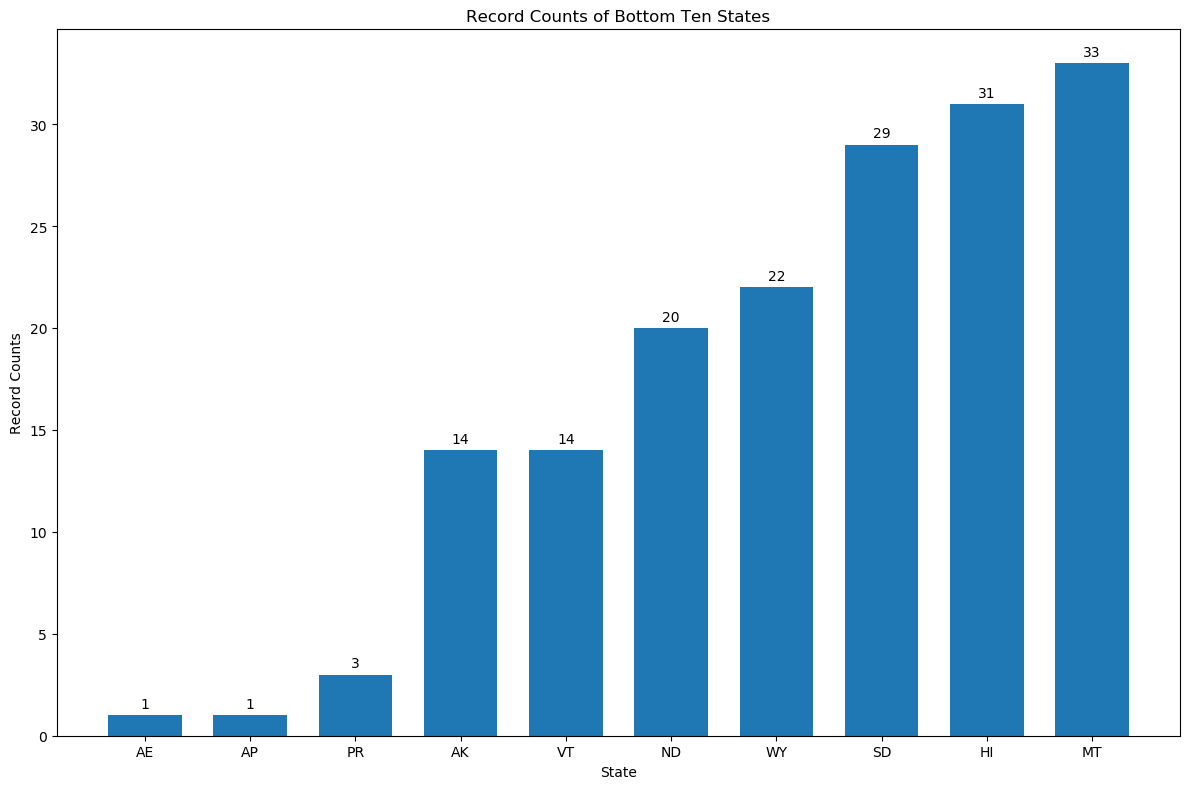

In [212]:
# Create a bar graph
from operator import itemgetter

#Create a new dictionary with the record counts of the ten bottom states
bottom_ten = dict(sorted(count_by_state.items(), key = itemgetter(1))[:10])

#Create a horizontal bar chart
states = list(bottom_ten.keys())
counts = list(bottom_ten.values())

x = np.arange(len(states))  # the states
width = .7  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
rects1 = ax.bar(x, counts, width, label='State')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Record Counts')
ax.set_xlabel('State')
ax.set_title('Record Counts of Bottom Ten States')
ax.set_xticks(x)
ax.set_xticklabels(states)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

fig.tight_layout()

plt.show()

## Visualize the average age of people within the top 10 states.

In [190]:
cur.execute("""SELECT vb_tsmart_state, AVG(EXTRACT(year FROM age(current_date,vb_voterbase_db))) as age FROM voters
    GROUP BY vb_tsmart_state
    ORDER BY vb_tsmart_state ASC""")
age_by_state_list = cur.fetchall()

In [202]:
# Create a dictionary with states as keys and average age as values
age_by_state = dict(age_by_state_list)
del age_by_state['(null)']
age_by_state_updated = {k: v for k, v in age_by_state.items() if v is not None}

In [211]:
# Create a new dictionary with the average age of only the top ten states
top_ten = dict(sorted(age_by_state_updated.items(), key = itemgetter(1), reverse=True)[:10])
for k, v in top_ten.items():
    top_ten[k] = round(int(v))

In [210]:
# Here are the top ten oldest states
top_ten

{'PR': 75,
 'WI': 65,
 'HI': 55,
 'ND': 54,
 'MS': 50,
 'ID': 48,
 'WY': 47,
 'MT': 47,
 'VT': 46,
 'AZ': 45}

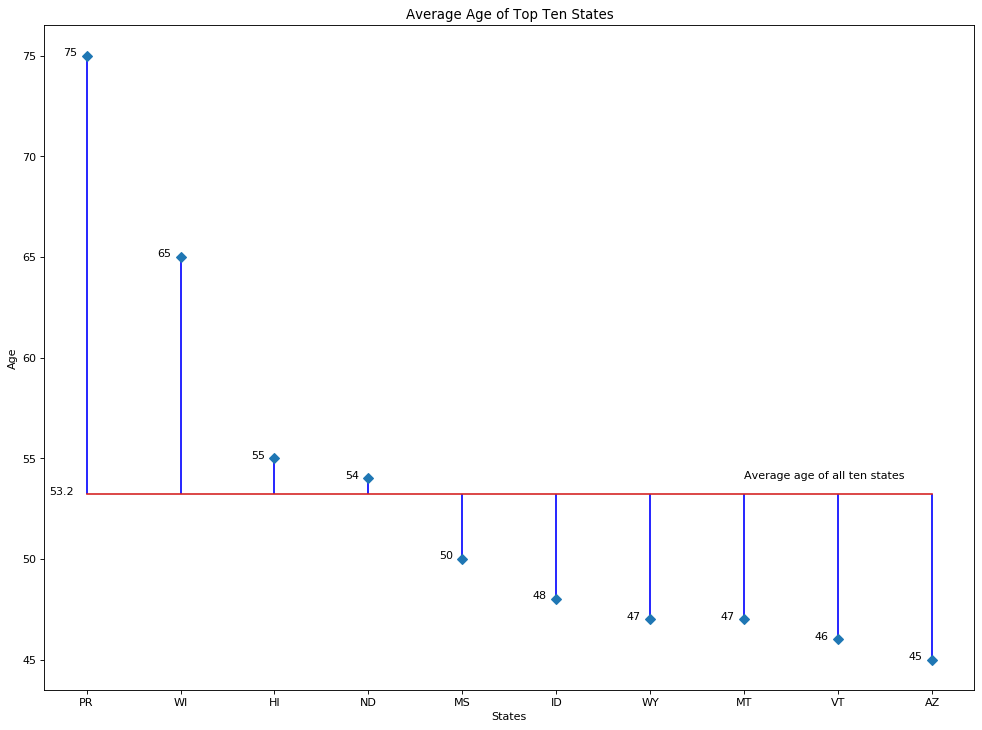

In [277]:
# Create a stem plot showing average age of each state with a midline being the average of the 10 states
from matplotlib.pyplot import figure

figure(figsize=(15, 11), dpi=80)

fig = plt.stem(
    x, y, linefmt='blue', markerfmt='D', bottom=53.2, use_line_collection=True)  #draws midline at the average age of the ten states
markerline.set_markerfacecolor('none')

plt.title('Average Age of Top Ten States')
plt.xlabel('States')
plt.ylabel('Age')
plt.text(7,54,'Average age of all ten states')
plt.text(-.4,53.2,'53.2')
plt.text(-.25,75,'75')
plt.text(.75,65,'65')
plt.text(1.75,55,'55')
plt.text(2.75,54,'54')
plt.text(3.75,50,'50')
plt.text(4.75,48,'48')
plt.text(5.75,47,'47')
plt.text(6.75,47,'47')
plt.text(7.75,46,'46')
plt.text(8.75,45,'45')


plt.show()

## What is the most common first name in each state?

In [263]:
cur.execute("""
SELECT vb_tsmart_state, vb_tsmart_first_name
    from (select vb_tsmart_state, vb_tsmart_first_name, count(*) as cnt,
    row_number() over (partition by vb_tsmart_state order by count(*) desc) as seqnum
    from voters
    group by vb_tsmart_state, vb_tsmart_first_name
    ) yn
where seqnum = 1;""")
cur.fetchall()

[('(null)', 'SUSAN'),
 ('AE', 'STEPHANIE'),
 ('AK', 'CIERRA'),
 ('AL', 'WILLIAM'),
 ('AP', 'CAROLINE'),
 ('AR', 'RACHEL'),
 ('AZ', 'MICHAEL'),
 ('CA', 'MICHAEL'),
 ('CO', 'MICHAEL'),
 ('CT', 'MICHAEL'),
 ('DC', 'DANIEL'),
 ('DE', 'GARY'),
 ('FL', 'MICHAEL'),
 ('GA', 'MICHAEL'),
 ('HI', 'JUSSI'),
 ('IA', 'LOGAN'),
 ('ID', 'DAVID'),
 ('IL', 'CHRISTOPHER'),
 ('IN', 'MICHAEL'),
 ('KS', 'JENNIFER'),
 ('KY', 'ROBERT'),
 ('LA', 'DANIEL'),
 ('MA', 'MARIA'),
 ('MD', 'MICHAEL'),
 ('ME', 'JOHN'),
 ('MI', 'MICHAEL'),
 ('MN', 'AMY'),
 ('MO', 'MICHAEL'),
 ('MS', 'KEYERICA'),
 ('MT', 'STEVEN'),
 ('NC', 'ROBERT'),
 ('ND', 'PARKER'),
 ('NE', 'JOSHUA'),
 ('NH', 'TYLER'),
 ('NJ', 'ROBERT'),
 ('NM', 'HECTOR'),
 ('NV', 'MICHAEL'),
 ('NY', 'JOSEPH'),
 ('OH', 'MICHAEL'),
 ('OK', 'KATHRYN'),
 ('OR', 'DANIEL'),
 ('PA', 'JOSEPH'),
 ('PR', 'JUAN'),
 ('RI', 'ALEXANDRA'),
 ('SC', 'JAMES'),
 ('SD', 'JAMES'),
 ('TN', 'JOHN'),
 ('TX', 'MICHAEL'),
 ('UT', 'KEVIN'),
 ('VA', 'MATTHEW'),
 ('VT', 'NATHAN'),
 ('WA', 'MICHA